In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/spotify-2023.csv", encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob



Observations

The data consists of 23 columns
some rows have null values


Data pre-processing

There is a row in which wrong values are there in the "streams" column so we have to remove this index 574.
 After removing that row we can convert the streams column into intger data type

In [ ]:
df = df.drop(index = 574)
df['streams'] = df['streams'].apply(lambda x: int(x))

In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df["in_shazam_charts"].fillna(0,inplace=True)
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df.sort_values(by=["streams"],ascending=False).head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,186,G,Major,68,49,59,16,0,13,28





What were the most streamed artists on spotify in 2023?
Since in the "artits(s)_name" column there are multiple artists in a single colummn and want to find the Number of streams for each artist we need to separate artists into seperate rows

In [ ]:
df["artist(s)_name"] = df['artist(s)_name'].str.split(',')
df_exploded = df.explode('artist(s)_name')
df_exploded.rename(columns={"artist(s)_name":"artist_name"},inplace=True)
df_exploded["artist_name"]=df_exploded["artist_name"].astype(str)
df_exploded.dtypes

track_name              object
artist_name             object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [ ]:
df_exploded["artist_name"]=df_exploded["artist_name"].str.lstrip()

In [ ]:
artist_streams = df_exploded.groupby('artist_name')['streams'].sum().sort_values(ascending=False)
artist_streams.head(10)

artist_name
The Weeknd       23929760757
Bad Bunny        23813527270
Ed Sheeran       15316587718
Taylor Swift     14630378183
Harry Styles     11608645649
Eminem           10193727260
Dua Lipa          9980020481
Justin Bieber     8243081039
Drake             8043031261
BTS               7780428159
Name: streams, dtype: int64

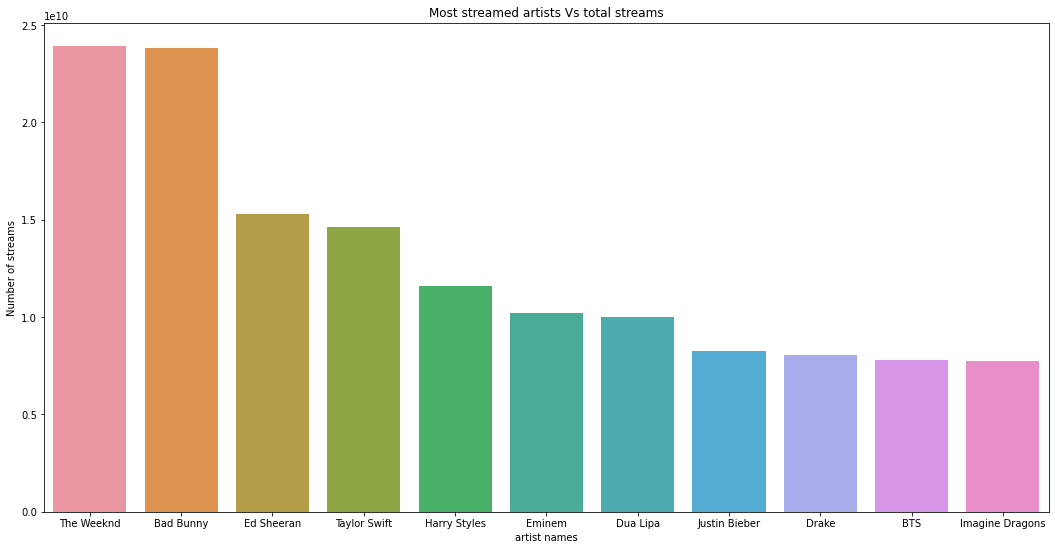

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,9))
plt.title("Most streamed artists Vs total streams")
plt.ylabel("Number of streams")
plt.xlabel("artist names")
sns.barplot(x=artist_streams.index.tolist()[:11],y=artist_streams.values.tolist()[:11])
plt.show()

Text(0.5, 1.0, 'Top 10 songs streamed on Spotify')

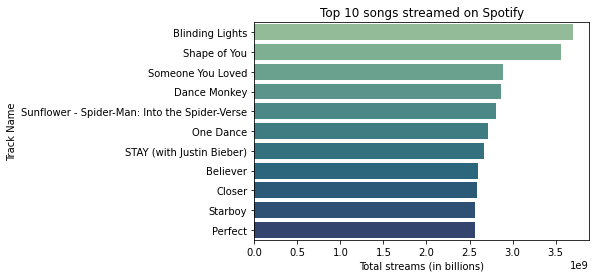

In [ ]:
#Top 10 streamed songs on Spotify
top_streamed_spotify = df[['track_name', 'artist(s)_name' , 'streams', 'released_year']].sort_values(by='streams', ascending=False);

sns.barplot(x=top_streamed_spotify[:11]['streams'], y=top_streamed_spotify[:11]['track_name'], palette='crest')
plt.xlabel("Total streams (in billions)")
plt.ylabel("Track Name")
plt.title("Top 10 songs streamed on Spotify")

In [ ]:
unique_arr = df["artist_count"].unique()
unique_arr

array([2, 1, 3, 8, 4, 5, 6, 7], dtype=int64)

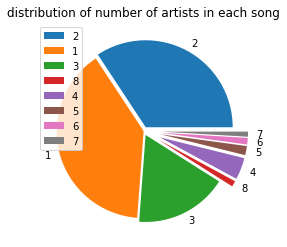

In [ ]:
pie_arr=[]
for i in unique_arr:
    pie_arr.append(df.loc[df["artist_count"]==i]["artist_count"].sum().tolist())
labels = unique_arr
explode = [0.05,0,0.05,0.2,0.2,0.2,0.2,0.2]
plt.pie(pie_arr,labels = labels,explode = explode)
plt.title("distribution of number of artists in each song")
plt.legend()
plt.show()

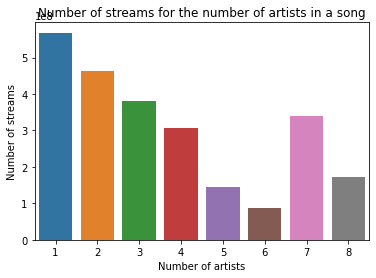

In [ ]:
values_NoArtists = []
for i in unique_arr:
    values_NoArtists.append(df.loc[df["artist_count"]==i]["streams"].mean())
sns.barplot(x=unique_arr,y=values_NoArtists)
plt.title("Number of streams for the number of artists in a song")
plt.xlabel("Number of artists")
plt.ylabel("Number of streams")
plt.show()

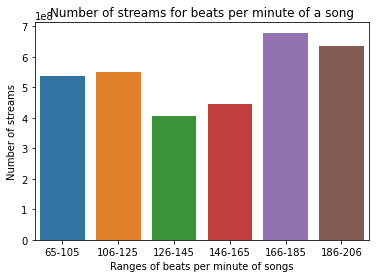

In [ ]:
values_bpm = [
    df.loc[(df["bpm"]>=65) & (df["bpm"]<=105)]["streams"].mean(),
    df.loc[(df["bpm"]>=106) & (df["bpm"]<=125)]["streams"].mean(),
    df.loc[(df["bpm"]>=126) & (df["bpm"]<=145)]["streams"].mean(),
    df.loc[(df["bpm"]>=146) & (df["bpm"]<=165)]["streams"].mean(),
    df.loc[(df["bpm"]>=166) & (df["bpm"]<=185)]["streams"].mean(),
    df.loc[(df["bpm"]>=186) & (df["bpm"]<=206)]["streams"].mean(),
]
labels_bpm = ["65-105","106-125","126-145","146-165","166-185","186-206"]
sns.barplot(x =labels_bpm,y=values_bpm)
plt.title("Number of streams for beats per minute of a song")
plt.xlabel("Ranges of beats per minute of songs")
plt.ylabel("Number of streams")
plt.show()

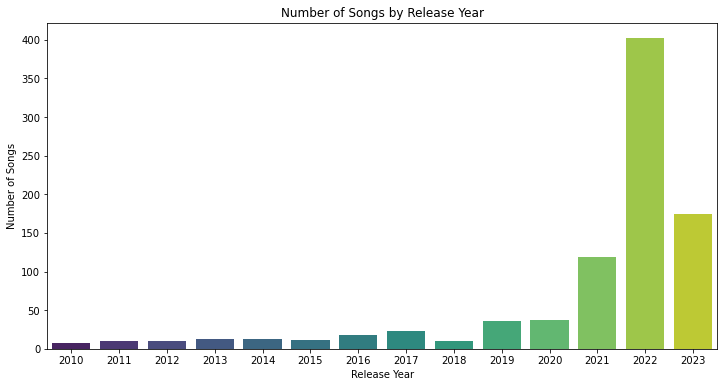

In [ ]:
songs_by_year = df['released_year'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']
# Plotting using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=songs_by_year.head(14), palette='viridis')
plt.title('Number of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()

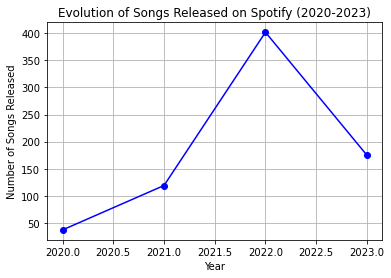

In [ ]:
filtered_data = df[(df['released_year'] >= 2020) & (df['released_year'] <= 2023)]
song_counts_by_year = filtered_data['released_year'].value_counts().sort_index()
plt.plot(song_counts_by_year.index, song_counts_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.title('Evolution of Songs Released on Spotify (2020-2023)')
plt.grid(True)

In [ ]:
df['released_month']

0       7
1       3
2       6
3       8
4       5
       ..
948    11
949    10
950    11
951    10
952    11
Name: released_month, Length: 952, dtype: int64

<AxesSubplot:xlabel='released_month', ylabel='count'>

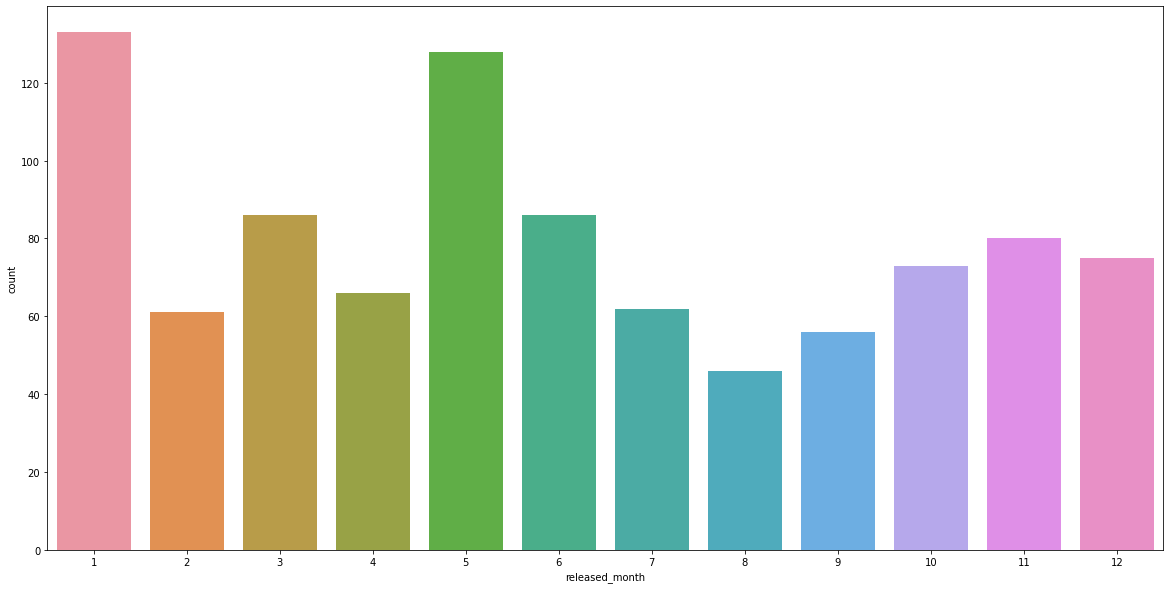

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="released_month")

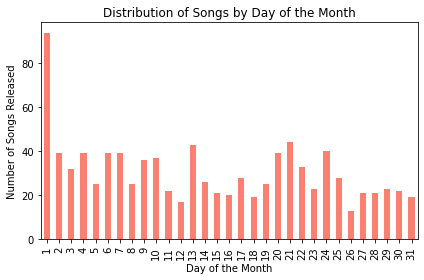

In [ ]:
songs_by_day = df.groupby('released_day')['track_name'].count()
songs_by_day.plot(kind='bar', color='salmon')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Songs Released')
plt.title('Distribution of Songs by Day of the Month')

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Between Danceability, Valence, and Energy')

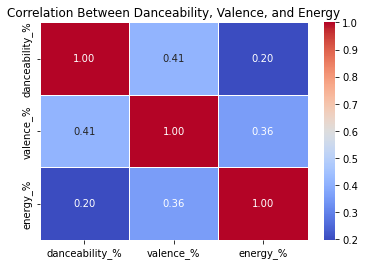

In [ ]:
correlation_matrix = df[['danceability_%', 'valence_%', 'energy_%']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Danceability, Valence, and Energy')

In [ ]:
cross_platform_columns = [
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]
cross_platform_corr_matrix = df[cross_platform_columns].corr()
cross_platform_corr_matrix

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts
in_spotify_playlists,1.000000,0.164182,0.708258,0.271162,0.144227
in_spotify_charts,0.164182,1.000000,0.233057,0.551985,0.600101
in_apple_playlists,0.708258,0.233057,1.000000,0.414184,0.368862
in_apple_charts,0.271162,0.551985,0.414184,1.000000,0.383443
in_deezer_charts,0.144227,0.600101,0.368862,0.383443,1.000000


Text(0.5, 1.0, 'Correlation Heatmap: Cross-Platform Metrics')

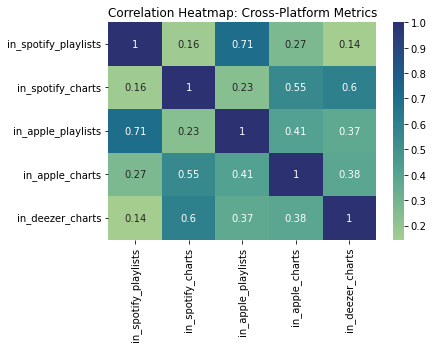

In [ ]:
sns.heatmap(cross_platform_corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap: Cross-Platform Metrics')